In [44]:
print('Hello World')

Hello World


In [45]:
x = ';ljskdf'
print(x)

;ljskdf


In [46]:
print(f"my name is {x}")

my name is ;ljskdf


In [47]:
import numpy as np

In [48]:
a = np.zeros([3,4])
b = np.zeros([4,4])
a, b

a @ b

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [49]:
a = np.zeros(3)
b = np.zeros(3)
a*b

array([0., 0., 0.])

In [27]:
c = np.array([[1,2],[3,4]])
d = np.array([[2,2],[2,2]])
c@d

array([[ 6,  6],
       [14, 14]])

### Import Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Import Data

In [57]:
# path = 'https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome'
path = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
df = pd.read_csv(path)
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


### Data Preparation

In [59]:
y = df['logS']

In [60]:
x = df.drop('logS', axis=1)

### Data splitting

In [61]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

### Model Building ### 

#### Linear Regression ####

In [62]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Applying the model to make a prediction ####

In [64]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

#### Evaluate model performance ####

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred) 

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred) 

In [70]:
print('LR MSE TRAIN: ', lr_train_mse) 
print('LR R2 TRAIN: ', lr_train_r2)
print('LR MSE TEST: ', lr_test_mse)
print('LR R2 TEST: ', lr_test_r2)

LR MSE TRAIN:  1.007536295109369
LR R2 TRAIN:  0.7645051774663391
LR MSE TEST:  1.0206953660861033
LR R2 TEST:  0.7891616188563282


In [79]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Random Forest ##

### Training the Model ###

In [81]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying Model to make a prediction ###

In [82]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluate model performance ###

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred) 

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred) 

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [87]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data Visualization of prediction results ##

Text(0.5, 0, 'Experimental LogS')

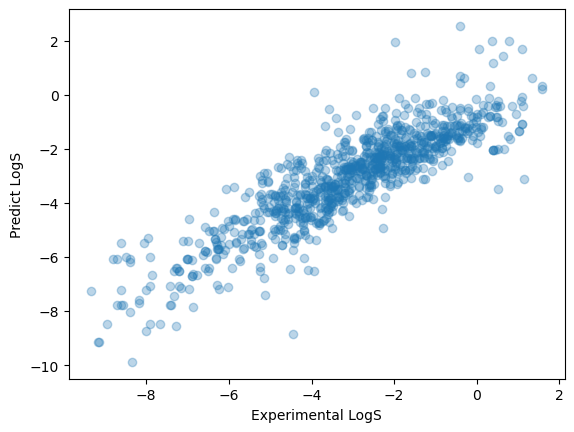

In [92]:
import matplotlib.pyplot as plt

plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot()
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')